In [1]:
%load_ext tensorboard
%matplotlib inline

In [2]:
import gymnasium as gym
from IPython import display
import matplotlib

import matplotlib.pyplot as plt
from collections import namedtuple
from torch.utils.tensorboard import SummaryWriter

env = gym.make('LunarLander-v3', render_mode=None)

num_episodes = 6000
max_memory_size = 1024 * 1024
batch_size = 128

writer = SummaryWriter()

In [3]:
from models import NaiveDeepQNetwork, ReplayMemory

dqn = NaiveDeepQNetwork(env)
memory = ReplayMemory(max_memory_size)

In [4]:
total_rewards = []

for i in range(num_episodes):
    obs, info = env.reset()
    # img = plt.imshow(env.render()) # only call this once
    tr = 0
    step_cnt = 0

    while True:
        action = dqn.take_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # train model
        memory.push(obs, action, reward, next_obs, terminated)
        transitions = memory.sample(batch_size)
        dqn.train(transitions)

        # Transition = namedtuple('Transition', ['state', 'action', 'reward', 'next_state', 'final'])
        # print(Transition(*zip(*transitions)))

        # # update env. display
        # img.set_data(env.render()) # just update the data
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

        if terminated or truncated:
            break

        obs = next_obs
        tr += reward
        step_cnt += 1

        if step_cnt % 10 == 0:
            print(f"\t{step_cnt}: {tr} (#steps = {step_cnt})", end='\r')

    writer.add_scalar("reward", tr, i)
    total_rewards.append(tr)
    
    if i % 10 == 0:
        print("\r                                                                                                              ")
        print(f"{i}: {sum(total_rewards) / len(total_rewards)}")
        total_rewards.clear()
        writer.flush()
    
writer.close()

                                                                                                              
0: -308.57772063128266
                                                                                                              
10: -535.937119405055
                                                                                                              
20: -499.2633909375947
                                                                                                              
30: -353.1020738238514
                                                                                                              
40: -206.6392006194037
                                                                                                              
50: -138.44919847901522
                                                                                                              
60: -282.6891813758723
                                                              

KeyboardInterrupt: 

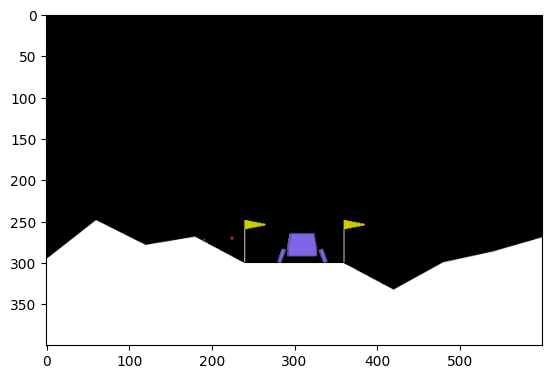

In [14]:
total_rewards = []
env = gym.make('LunarLander-v3', render_mode='rgb_array')

for i in range(num_episodes):
    obs, info = env.reset()
    img = plt.imshow(env.render()) # only call this once
    tr = 0
    step_cnt = 0

    while True:
        action = dqn.take_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # train model
        # memory.push(obs, action, reward, next_obs, terminated)
        # transitions = memory.sample(batch_size)
        # dqn.train(transitions)

        # Transition = namedtuple('Transition', ['state', 'action', 'reward', 'next_state', 'final'])
        # print(Transition(*zip(*transitions)))

        # # update env. display
        img.set_data(env.render()) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)

        if terminated or truncated:
            break

        obs = next_obs
        tr += reward
        step_cnt += 1

        # if step_cnt % 10 == 0:
        #     print(f"\t{step_cnt}: {tr} (#steps = {step_cnt})", end='\r')

    total_rewards.append(tr)
    
    # if i % 10 == 0:
    #     print("\r                                                                                                              ")
    #     print(f"{i}: {sum(total_rewards) / len(total_rewards)}")
    #     total_rewards.clear()
    
    

In [13]:
import torch
torch.save(dqn.qnet.state_dict(), 'models/simple_dqn.pth')